In [2]:
import pandas as pd

df = pd.read_csv("Credit.csv")

df

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [3]:
df = df.drop(["Unnamed: 0","Gender","Student","Married","Ethnicity","Balance"], axis=1)

In [4]:
df.head()

,Income,Limit,Rating,Cards,Age,Education
0,14.891,3606,283,2,34,11
1,106.025,6645,483,3,82,15
2,104.593,7075,514,4,71,11
3,148.924,9504,681,3,36,11
4,55.882,4897,357,2,68,16


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
dtypes: float64(1), int64(5)
memory usage: 18.9 KB


In [6]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000


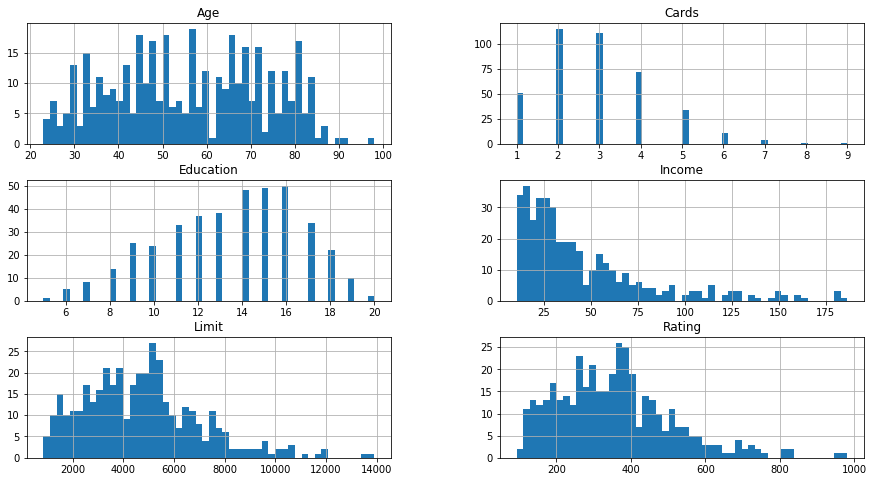

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

df.hist(bins=50,figsize=(15,8))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218517DC508>,
      dtype=object)

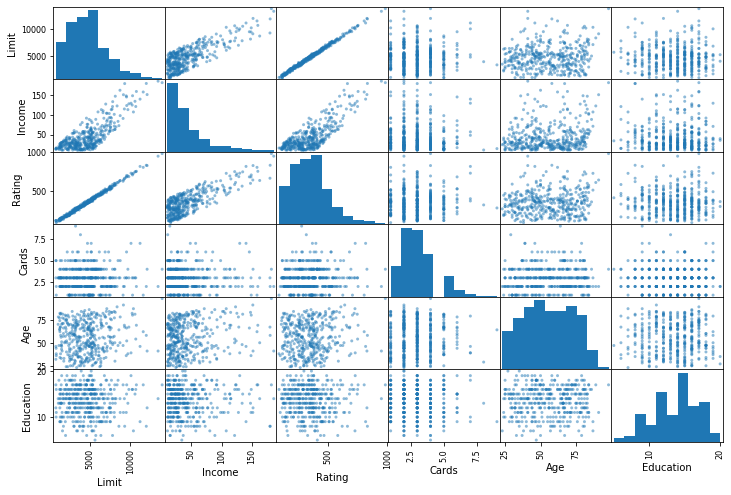

In [8]:
# Correlation shows how features are related... [-1 - 1].
# Close to 1.0 = strong positive correlation.
# Close to -1.0 = strong negative (inverse) correlation.
# Close to 0 = no correlation.
# Let's graph these. We're looking for lines in a scatterplot

from pandas.plotting import scatter_matrix

attributes = ['Limit','Income','Rating','Cards','Age','Education']

scatter_matrix(df[attributes], figsize=(12,8))


In [11]:
corr_matrix = df.corr()

corr_matrix['Limit'].sort_values(ascending = False)

Limit        1.000000
Rating       0.996880
Income       0.792088
Age          0.100888
Cards        0.010231
Education   -0.023549
Name: Limit, dtype: float64

#### Income as the predictor

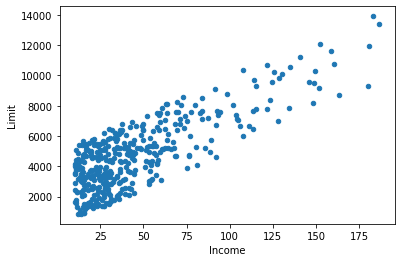

In [9]:
#Income vs Limit
df.plot(kind="scatter", x="Income", y="Limit")

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Income')]

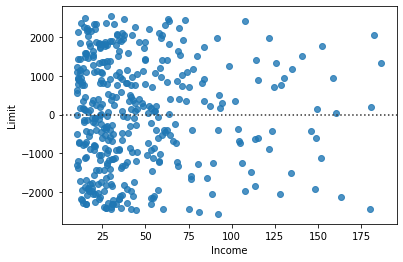

In [10]:
#Resid plot for Income vs Limit
import seaborn as sns

r1 = sns.residplot("Income", "Limit", data=df)

r1.set(xlabel = 'Income', ylabel = 'Limit')


In [48]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X1 = df["Income"].values.reshape(-1,1)

Y = df["Limit"].values.reshape(-1,1)

reg.fit(X1,Y)

reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Using SLR, Income is a good predictor of Limit

In [49]:
reg.coef_

array([[51.8750206]])

In [50]:
reg.intercept_

array([2389.86940892])

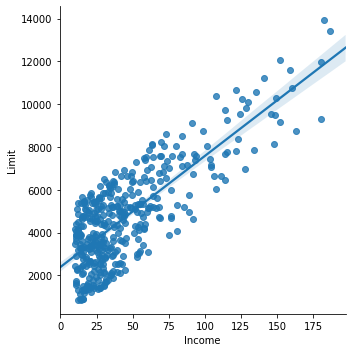

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.lmplot(x='Income',y='Limit', data = df)

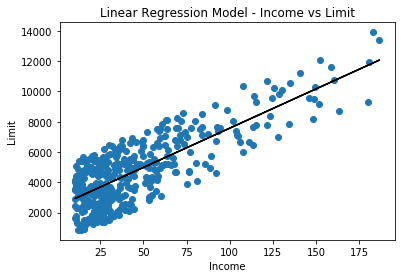

In [52]:
X1 = df["Income"].values.reshape(-1,1)

Y = df["Limit"].values.reshape(-1,1)

hypothesis = reg.predict(X1)
plt.scatter(X1, Y)
plt.title("Linear Regression Model - Income vs Limit")
plt.xlabel("Income")
plt.ylabel("Limit")
plt.plot(X1, hypothesis, color='black')
plt.show()

In [53]:
reg.score(X1,Y)

0.6274039404819071

In [54]:
#Train and Test Data Split
# Let's split into train & test. This will allow us to train a model
# (on the "train" material) and give us an idea of how each model 
# will perform on unseen data ("test" material).

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [55]:
train_set, test_set = split_train_test(df,0.2)

print(len(train_set), "train +",len(test_set),"test")

320 train + 80 test


In [56]:
train_labels = train_set.Limit
test_labels = test_set.Limit

test_labels #indices and the labels

388    6827
285    1626
359    4471
206    2450
225    5673
       ... 
393    1335
115    4828
245    2001
179    7499
203    6784
Name: Limit, Length: 80, dtype: int64

In [57]:
train_features = train_set.drop(columns = ["Limit","Rating","Cards","Age","Education"])
test_features = test_set.drop(columns = ["Limit","Rating","Cards","Age","Education"])
train_features.head()

,Income
146,17.055
142,103.893
310,33.694
77,20.936
220,44.847


In [58]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# Now that we have a (trained) model, let's predict how well it performs on the test set
# We'll evaluate the performance with a typical metric: root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

hypothesis = lin_reg.predict(test_features)
mse = mean_squared_error(test_labels, hypothesis)
print("RMSE:", np.sqrt(mse))

RMSE: 1408.3205195996475


In [60]:
lin_reg.score(test_features, test_labels)

0.6526979450594868

In [61]:
lin_reg.coef_

array([51.03558459])

In [62]:
lin_reg.intercept_

2380.1205343413185

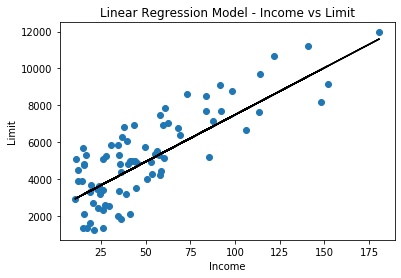

In [63]:
plt.scatter(test_features, test_labels)
plt.title("Linear Regression Model - Income vs Limit")
plt.xlabel("Income")
plt.ylabel("Limit")
plt.plot(test_features, hypothesis, color='black')
plt.show()

#### Rating as the predictor

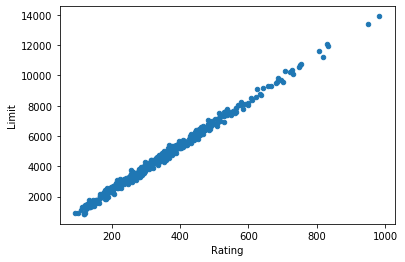

In [64]:
#Rating vs Limit
df.plot(kind="scatter", x="Rating", y="Limit")

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Rating')]

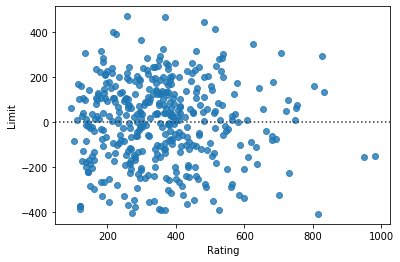

In [65]:
#Resid plot for Rating vs Limit
import seaborn as sns

r1 = sns.residplot("Rating", "Limit", data=df)

r1.set(xlabel = 'Rating', ylabel = 'Limit')

#### Using SLR, Rating is a very good predictor for Limit prediction

In [66]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X2 = df["Rating"].values.reshape(-1,1)

Y = df["Limit"].values.reshape(-1,1)

reg.fit(X2,Y)

reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
reg.coef_

array([[14.87160712]])

In [68]:
reg.intercept_

array([-542.92822999])

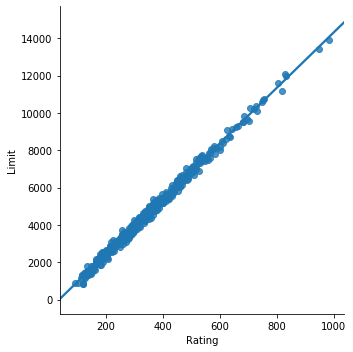

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.lmplot(x='Rating',y='Limit', data = df)

In [70]:
reg.score(X2,Y)

0.9937692100445441

In [71]:
train_features = train_set.drop(columns = ["Limit","Income","Cards","Age","Education"])
test_features = test_set.drop(columns = ["Limit","Income","Cards","Age","Education"])
train_features.head()

,Rating
146,371
142,549
310,369
77,253
220,437


In [72]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
# Now that we have a (trained) model, let's predict how well it performs on the test set
# We'll evaluate the performance with a typical metric: root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

hypothesis = lin_reg.predict(test_features)
mse = mean_squared_error(test_labels, hypothesis)
print("RMSE:", np.sqrt(mse))

RMSE: 184.88484067825067


In [74]:
lin_reg.score(test_features, test_labels)

0.9940144102727823

In [75]:
lin_reg.coef_

array([14.8737318])

In [76]:
lin_reg.intercept_

-543.8318549132409

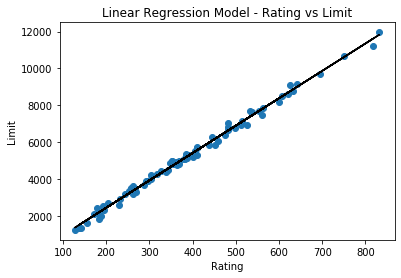

In [77]:
plt.scatter(test_features, test_labels)
plt.title("Linear Regression Model - Rating vs Limit")
plt.xlabel("Rating")
plt.ylabel("Limit")
plt.plot(test_features, hypothesis, color='black')
plt.show()

#### Cards as the predictor

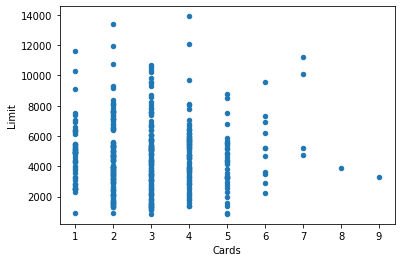

In [78]:
#Cards vs Limit
df.plot(kind="scatter", x="Cards", y="Limit")

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Cards')]

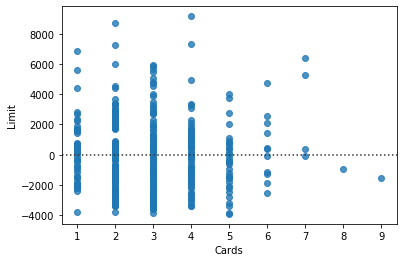

In [79]:
#Resid plot for Cards vs Limit
import seaborn as sns

r1 = sns.residplot("Cards", "Limit", data=df)

r1.set(xlabel = 'Cards', ylabel = 'Limit')

#### Using SLR, Cards is not a good predictor of Limit

In [82]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X1 = df["Cards"].values.reshape(-1,1)

Y = df["Limit"].values.reshape(-1,1)

reg.fit(X1,Y)

reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
reg.coef_

array([[17.22189457]])

In [84]:
reg.intercept_

array([4684.66624682])

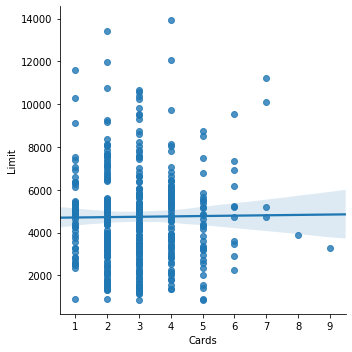

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.lmplot(x='Cards',y='Limit', data = df)

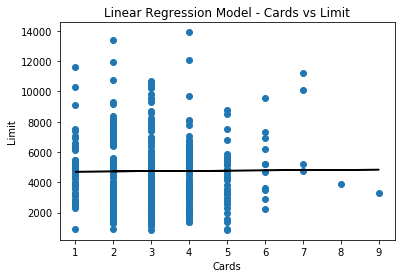

In [86]:
X1 = df["Cards"].values.reshape(-1,1)

Y = df["Limit"].values.reshape(-1,1)

hypothesis = reg.predict(X1)
plt.scatter(X1, Y)
plt.title("Linear Regression Model - Cards vs Limit")
plt.xlabel("Cards")
plt.ylabel("Limit")
plt.plot(X1, hypothesis, color='black')
plt.show()

In [90]:
reg.score(X1,Y)

0.00010468017486597869

In [89]:
train_features = train_set.drop(columns = ["Limit","Rating","Income","Age","Education"])
test_features = test_set.drop(columns = ["Limit","Rating","Income","Age","Education"])
train_features.head()

,Cards
146,3
142,3
310,1
77,1
220,3


In [91]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
# Now that we have a (trained) model, let's predict how well it performs on the test set
# We'll evaluate the performance with a typical metric: root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

hypothesis = lin_reg.predict(test_features)
mse = mean_squared_error(test_labels, hypothesis)
print("RMSE:", np.sqrt(mse))

RMSE: 2464.2973302016053


In [93]:
lin_reg.score(test_features, test_labels)

-0.0633850536101701

In [94]:
lin_reg.coef_

array([-37.774047])

In [95]:
lin_reg.intercept_

4733.302489223228

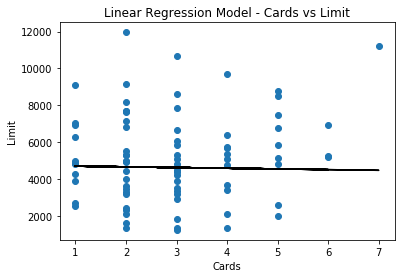

In [97]:
plt.scatter(test_features, test_labels)
plt.title("Linear Regression Model - Cards vs Limit")
plt.xlabel("Cards")
plt.ylabel("Limit")
plt.plot(test_features, hypothesis, color='black')
plt.show()

#### Age as the predictor

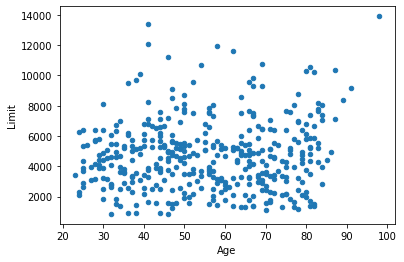

In [98]:
#Age vs Limit
df.plot(kind="scatter", x="Age", y="Limit")

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Age')]

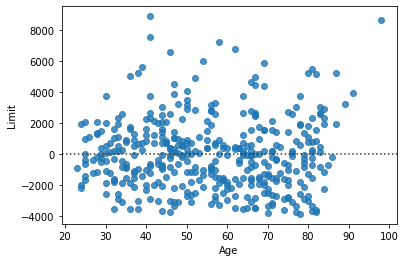

In [131]:
#Resid plot for Age vs Limit
import seaborn as sns

r1 = sns.residplot("Age", "Limit", data=df)

r1.set(xlabel = 'Age', ylabel = 'Limit')

#### Using SLR, Age is fairly a good predictor of Limit when compared with Cards but not as good as Rating or Income.

In [100]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X1 = df["Age"].values.reshape(-1,1)

Y = df["Limit"].values.reshape(-1,1)

reg.fit(X1,Y)

reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
reg.coef_

array([[13.49982568]])

In [102]:
reg.intercept_

array([3984.09845403])

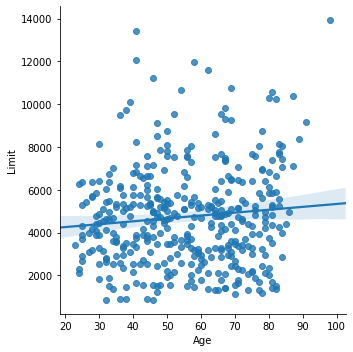

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.lmplot(x='Age',y='Limit', data = df)

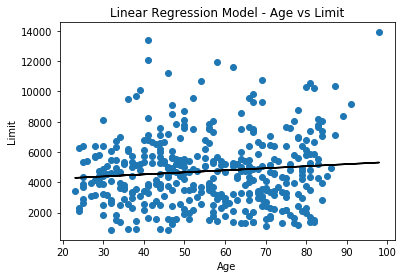

In [105]:
X1 = df["Age"].values.reshape(-1,1)

Y = df["Limit"].values.reshape(-1,1)

hypothesis = reg.predict(X1)
plt.scatter(X1, Y)
plt.title("Linear Regression Model - Age vs Limit")
plt.xlabel("Age")
plt.ylabel("Limit")
plt.plot(X1, hypothesis, color='black')
plt.show()

In [106]:
reg.score(X,Y)

0.2803142244046365

In [107]:
train_features = train_set.drop(columns = ["Limit","Rating","Cards","Income","Education"])
test_features = test_set.drop(columns = ["Limit","Rating","Cards","Income","Education"])
train_features.head()

,Age
146,55
142,84
310,52
77,30
220,53


In [108]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
# Now that we have a (trained) model, let's predict how well it performs on the test set
# We'll evaluate the performance with a typical metric: root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

hypothesis = lin_reg.predict(test_features)
mse = mean_squared_error(test_labels, hypothesis)
print("RMSE:", np.sqrt(mse))

RMSE: 2443.2846619566303


In [110]:
lin_reg.score(test_features, test_labels)

-0.04532774141294227

In [111]:
lin_reg.coef_

array([13.72670482])

In [112]:
lin_reg.intercept_

3867.0715493900857

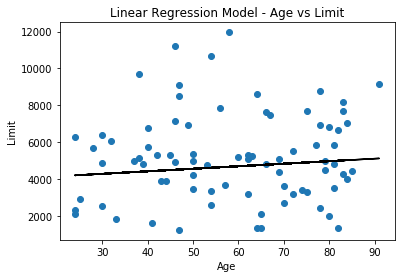

In [113]:
plt.scatter(test_features, test_labels)
plt.title("Linear Regression Model - Age vs Limit")
plt.xlabel("Age")
plt.ylabel("Limit")
plt.plot(test_features, hypothesis, color='black')
plt.show()

#### Education as the predictor

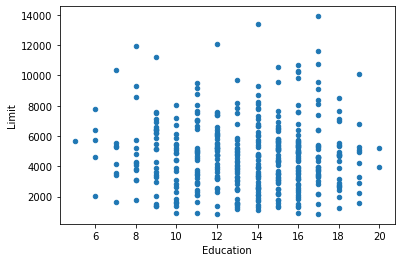

In [114]:
#Education vs Limit
df.plot(kind="scatter", x="Education", y="Limit")

[Text(0, 0.5, 'Limit'), Text(0.5, 0, 'Education')]

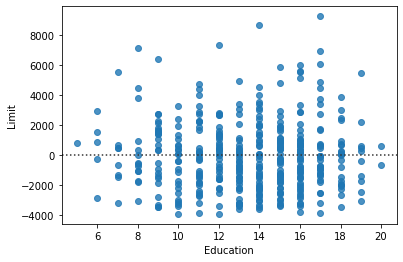

In [115]:
#Resid plot for Education vs Limit
import seaborn as sns

r1 = sns.residplot("Education", "Limit", data=df)

r1.set(xlabel = 'Education', ylabel = 'Limit')

#### Using SLR, Education is not a good predictor of Limit when compared to Rating, Income and Age as predictors

In [116]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X1 = df["Education"].values.reshape(-1,1)

Y = df["Limit"].values.reshape(-1,1)

reg.fit(X1,Y)

reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
reg.coef_

array([[-17.39235309]])

In [118]:
reg.intercept_

array([4969.52714909])

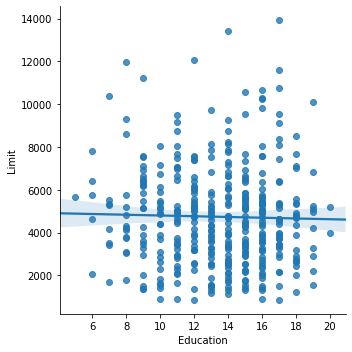

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.lmplot(x='Education',y='Limit', data = df)

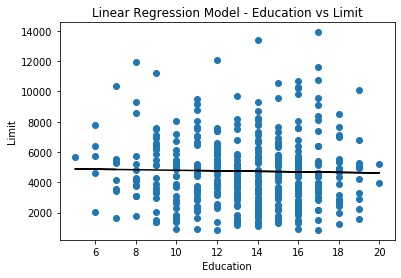

In [120]:
X1 = df["Education"].values.reshape(-1,1)

Y = df["Limit"].values.reshape(-1,1)

hypothesis = reg.predict(X1)
plt.scatter(X1, Y)
plt.title("Linear Regression Model - Education vs Limit")
plt.xlabel("Education")
plt.ylabel("Limit")
plt.plot(X1, hypothesis, color='black')
plt.show()

In [121]:
reg.score(X1,Y)

0.0005545334620582487

In [122]:
train_features = train_set.drop(columns = ["Limit","Rating","Cards","Age","Income"])
test_features = test_set.drop(columns = ["Limit","Rating","Cards","Age","Income"])
train_features.head()

,Education
146,15
142,17
310,16
77,15
220,13


In [123]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
# Now that we have a (trained) model, let's predict how well it performs on the test set
# We'll evaluate the performance with a typical metric: root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

hypothesis = lin_reg.predict(test_features)
mse = mean_squared_error(test_labels, hypothesis)
print("RMSE:", np.sqrt(mse))

RMSE: 2467.304673619229


In [125]:
lin_reg.score(test_features, test_labels)

-0.06598207414388035

In [126]:
lin_reg.coef_

array([16.16098274])

In [127]:
lin_reg.intercept_

4403.829644855858

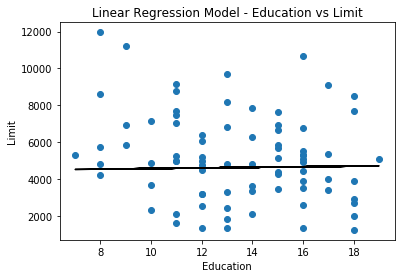

In [128]:
plt.scatter(test_features, test_labels)
plt.title("Linear Regression Model - Education vs Limit")
plt.xlabel("Education")
plt.ylabel("Limit")
plt.plot(test_features, hypothesis, color='black')
plt.show()

#### Thus, only Rating and Income predicts Limit with high accuracy.